# Import modules

In [1]:
import SISSO_analysis.cross_validation as cv
import SISSO_analysis.evaluation as evl
import SISSO_analysis.plot as plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create Cross Validation Data

cross_validation.py is for this use.

The functions in the file are:

1. fold(current_path, target_path, property_name, num_fold):
Create num_fold-fold cross validation data.

2. leave_out(current_path, target_path, property_name, num_iter, num_out=0, frac=0):
Create leave-num_out-out cross validation data if num_out is given, or leave-frac%-out cross vadlidation data if num_out is not given and frac is given.

Arguments:
1. current_path:
The path of original data. Please include at least 3 files:
    1. SISSO.in: input file of SISSO. Please input the arguments of the input file before you create the cross validation data. 'nsample' in SISSO.in (number of samples) will automatically changed when create the cross validation data, while other arguments will remain the same.
    2. train.dat: the training data. Please include all the training data.
    3. SISSO: the SISSO program.

In [2]:
# example
property_name = 'Grun_300'
current_path = '/home/xu/Desktop/%s'%property_name
target_path = '/home/xu/Desktop/test'

# create the corss validation data
cv.fold(current_path, target_path, property_name, 10)
# or cv.leave_out(current_path, target_path, property_name, num_iter = 30, num_out = 5)

Then you'll create the directory 'Grun_300_cv' in target_path.

In the directory, there are 'train.dat' containing the whole data, 'cross_validation_info.dat' containing the information about the cross validation, and 10 directories 'Grun_300_cv0-9'. 

Each directory contains 'shuffle.dat' containing the sample indices in the training data and validation data, 'SISSO.in' containing the input file of SISSO, 'train.dat' containing the sampled data, and 'validation.dat' containing the validation data.

# Evaluation of the SISSO Results

Here are two main class:
1. Result: evaluation of only one SISSO result.
2. Results: evaluation of many SISSO results, like cross validation results.

Using these types can help you get the information about results quickly.

## Class Result

Let's see the example of class Result.

### Create class

To create an instance of class Result, you only need to input the path to the directory of your SISSO result.

In [3]:
current_path='/home/xu/Desktop/server/cv/total/%s'%property_name
total=evl.Result(current_path)

### Attributes and Methods

It's quickly for you to get the information about the SISSO results, because it is stored in the atrributes of your instance, and some other information can be got by calling some methods.

#### Information about the input file and data set

In [4]:
total.data.head()

,Material,grun_300,mass_A,mass_B,number_A,number_B,period_A,period_B,atomic_homo_A,atomic_homo_B,...,rd_B,bond_length,volume,r2_300_333,r2_600_333,r2_300_222,r2_600_222,Cv_300,Cv_600,debye_freq
0,AgBr,2.437451,107.868200,79.90400,47,35,5,4,-4.419473,-7.852589,...,0.2281,2.837551,45.694211,0.688960,0.450315,0.564121,0.324282,49.195543,49.712180,2.527331
1,AgCl,2.296661,107.868200,35.45000,47,17,5,3,-4.419473,-8.560230,...,2.2374,2.724373,40.441715,0.657872,0.445103,0.677214,0.463843,48.670028,49.576175,2.321504
2,AgI,2.861833,107.868200,126.90447,47,53,5,5,-4.419473,-7.095321,...,0.4120,2.993050,53.625569,0.598387,0.354820,0.488183,0.289891,49.386087,49.760681,2.792621
3,AlN,1.679037,26.981538,14.00700,13,7,3,2,-2.688156,-7.035662,...,1.7008,2.024777,16.602046,0.974106,0.949230,0.955747,0.903008,32.251904,44.214384,22.994014
4,BaO,1.843063,137.327000,15.99900,56,8,6,2,-3.245411,-8.973012,...,2.3692,2.745065,41.370246,0.818798,0.656014,0.760547,0.560066,47.079513,49.142108,4.021186


In [5]:
total.property.head()

0    2.437451
1    2.296661
2    2.861833
3    1.679037
4    1.843063
Name: grun_300, dtype: float64

In [6]:
total.materials.head()

0    AgBr
1    AgCl
2     AgI
3     AlN
4     BaO
Name: Material, dtype: object

In [7]:
(total.rung,
total.dimension,
total.subs_sis,
total.samples_number,
total.operation_set,
total.property_name,
total.features_name)

(3,
 5,
 60,
 48,
 ['+', '-', '*', '/', 'exp', 'log', '^-1', '^2', '^3', 'sqrt', 'cbrt', '|-|'],
 'grun_300',
 ['mass_A',
  'mass_B',
  'number_A',
  'number_B',
  'period_A',
  'period_B',
  'atomic_homo_A',
  'atomic_homo_B',
  'atomic_lumo_A',
  'atomic_lumo_B',
  'EA_A',
  'EA_B',
  'IP_A',
  'IP_B',
  'rs_A',
  'rs_B',
  'rp_A',
  'rp_B',
  'rd_A',
  'rd_B',
  'bond_length',
  'volume',
  'r2_300_333',
  'r2_600_333',
  'r2_300_222',
  'r2_600_222',
  'Cv_300',
  'Cv_600',
  'debye_freq'])

#### Information about the SISSO results

Methods decriptors(), coefficients() and intercepts() return a list of descriptors, coefficients and intercepts.

The list index is the dimension of descriptor - 1, e.g. total.descriptors()\[1\] returns the list of 2D descriptors, and total.descriptors()\[1\]\[0\] returns the first descriptor of the 2D descriptors.

coefficients() and intercepts() are the same.

In [8]:
total.descriptors()

[['((((IP_B*period_B)/(rp_A*r2_600_333))*abs((atomic_homo_B/rs_A)-(atomic_lumo_B/rd_A))))'],
 ['((((IP_B*period_B)/(rp_A*r2_600_333))*abs((atomic_homo_B/rs_A)-(atomic_lumo_B/rd_A))))',
  '((((number_B/number_A)-(rd_B/rs_B))/((rp_B*r2_600_222)/log(rd_B))))'],
 ['((((IP_B*period_B)/(rp_A*r2_600_333))*abs((atomic_homo_B/rs_A)-(atomic_lumo_B/rd_A))))',
  '(((log(rd_B)*(IP_B/number_A))*((mass_A/mass_B)-(r2_600_333/r2_300_222))))',
  '((((period_A-period_B)*(number_B/atomic_lumo_B))/((r2_300_222/r2_600_333)-(rs_A/rp_B))))'],
 ['((((IP_B*period_B)/(rp_A*r2_600_333))*abs((atomic_homo_B/rs_A)-(atomic_lumo_B/rd_A))))',
  '(((log(rd_B)*(IP_B/r2_600_222))*((r2_300_222/number_B)-(r2_600_333/number_A))))',
  '((((period_A-period_B)*(mass_B/atomic_lumo_B))/((r2_300_222/r2_600_333)-(rs_A/rp_B))))',
  '((((EA_B)^2+(EA_A*IP_B))*((Cv_300*r2_300_333)-(Cv_600*r2_600_333))))'],
 ['((((IP_B*period_B)/(rp_A*r2_600_333))*abs((atomic_homo_B/rs_A)-(atomic_lumo_B/rd_A))))',
  '(((log(rd_B)*(IP_B/number_A))*((mass

In [9]:
total.coefficients()

[[0.003352115087],
 [0.003158632481, -0.01884936494],
 [0.003230516368, 0.1372431275, -5.078486353e-05],
 [0.003357513844, 0.1162247823, -2.3989889e-05, 0.001341945632],
 [0.003170804874, 0.145109493, -2.1950442e-05, 0.000160470767, 0.006698619126]]

In [10]:
total.intercepts()

[1.217252129, 1.173554108, 1.199522093, 1.176839405, 1.164663066]

features_percent() compute the percentages of each feature in top subs_sis 1D descriptors in file './feature_space/Uspace.name'

In [11]:
total.features_percent().T.head()

,percent
mass_A,0.0333333
mass_B,0.0333333
number_A,0.0333333
number_B,0.05
period_A,0.05


evaluate_expression(expression) returns the values of expression over data set.

However, 'evaluation.py' includes the evaluate_expression(express,data) function outside the class Result. You can use the function instead of method to compute the values.

In [12]:
total.evaluate_expression('((((IP_B*period_B)/(rp_A*r2_600_333))*abs((atomic_homo_B/rs_A)-(atomic_lumo_B/rd_A))))').head()

0    370.006408
1    333.385383
2    508.896028
3    115.211075
4     77.050586
dtype: float64

training_values() returns a 2D numpy array (sample_index, dimension), whose item is the value computed using descriptors found by SISSO.

In [13]:
total.training_values()

array([[2.45755619, 2.38518059, 2.40994367, 2.34151284, 2.43177774],
       [2.3347983 , 2.35361305, 2.4118205 , 2.36462101, 2.27362336],
       [2.92313018, 2.81697101, 2.83996234, 2.80073504, 2.78877861],
       [1.60345291, 1.5939385 , 1.64240973, 1.63323812, 1.61711746],
       [1.47553456, 1.75084156, 1.74558398, 1.81175558, 1.82281127],
       [1.39435901, 1.35010416, 1.31316388, 1.32724255, 1.36640425],
       [1.41853453, 1.37044081, 1.40136725, 1.41068757, 1.38537549],
       [3.04492833, 3.05993992, 3.00377025, 3.11343357, 3.10994898],
       [1.47945866, 1.60825373, 1.62339343, 1.53888051, 1.57232737],
       [1.50841047, 1.5175065 , 1.50369453, 1.47524261, 1.55174446],
       [1.45528057, 1.44015779, 1.47614257, 1.45350436, 1.35685393],
       [1.52146262, 1.49316921, 1.50868718, 1.50843455, 1.51991649],
       [1.48461713, 1.43943886, 1.428018  , 1.49667213, 1.54072055],
       [1.43402771, 1.45756549, 1.49914814, 1.53659913, 1.56091864],
       [1.45913662, 1.41274443, 1.

There are 2 types of methods to compute the errors:
1. training_errors(): returns a pandas DataFrame (dimension of descriptor, type of error).
2. items_training_errors(): returns a 2D numpy array (sample_index, dimension of descriptor), whose value is the error, i.e. prediction - property.

In [14]:
total.training_errors()

,RMSE,MAE,50%ile AE,75%ile AE,95%ile AE,MaxAE
1,0.145567,0.104651,0.063988,0.154691,0.345231,0.375531
2,0.095117,0.074053,0.053897,0.091127,0.216597,0.274869
3,0.067611,0.056060,0.046713,0.073635,0.121042,0.177046
4,0.048898,0.040787,0.037991,0.060464,0.092930,0.098404
5,0.036441,0.030727,0.028181,0.038348,0.063121,0.087852


In [15]:
total.items_training_errors()

array([[ 0.02010509, -0.05227052, -0.02750743, -0.09593827, -0.00567337],
       [ 0.03813745,  0.0569522 ,  0.11515965,  0.06796015, -0.0230375 ],
       [ 0.06129754, -0.04486163, -0.0218703 , -0.06109761, -0.07305403],
       [-0.07558378, -0.08509819, -0.03662696, -0.04579857, -0.06191923],
       [-0.36752869, -0.09222169, -0.09747928, -0.03130767, -0.02025199],
       [ 0.00110401, -0.04315085, -0.08009113, -0.06601245, -0.02685075],
       [ 0.06398794,  0.01589422,  0.04682066,  0.05614098,  0.0308289 ],
       [-0.09609182, -0.08108023, -0.1372499 , -0.02758658, -0.03107117],
       [-0.1182493 ,  0.01054577,  0.02568547, -0.05882745, -0.02538059],
       [ 0.04451824,  0.05361427,  0.0398023 ,  0.01135038,  0.08785223],
       [ 0.10017978,  0.085057  ,  0.12104178,  0.09840357,  0.00175315],
       [-0.01258929, -0.04088271, -0.02536474, -0.02561737, -0.01413543],
       [-0.05954586, -0.10472413, -0.11614499, -0.04749086, -0.00344244],
       [-0.09171704, -0.06817926, -0.0

## Class Results

Let's see the example of class Results.

### Create class

To create an instance of class Results, you need to input the path to the directory of your SISSO cross validation main directory, the property name and the number of cross validation iterations.

In [16]:
cv_number=10
current_path = '/home/xu/Desktop/server/cv/%s_cv/%s_cv1/' % (property_name, property_name)
grun_cv1 = evl.Results(current_path,property_name,cv_number)
current_path = '/home/xu/Desktop/server/cv/%s_cv/%s_cv2/' % (property_name, property_name)
grun_cv2 = evl.Results(current_path,property_name,cv_number)
current_path = '/home/xu/Desktop/server/cv/%s_cv/%s_cv3/' % (property_name, property_name)
grun_cv3 = evl.Results(current_path, property_name, cv_number)

grun_cv=[grun_cv1,grun_cv2,grun_cv3]

### Attributes and Methods
It's quickly for you to get the information about the SISSO results, because it is stored in the atrributes of your instance, and some other information can be got by calling some methods.

#### Information about the input file and data set
The difference between these attributes in class Results and that in class Reult is that they will usually return a list, whose index is the cross validation index and item is like class Reult.

For example, grun_cv1.data\[0\] returns the data in the first cross validation.

In [17]:
grun_cv1.data

[   Material  grun_300      mass_A      mass_B  number_A  number_B  period_A  \
 0       RbI  1.520748   85.467800  126.904470        37        53         5   
 1       RbH  1.127153   85.467800    1.008000        37         1         5   
 2      MgSe  1.725015   24.305000   78.971000        12        34         3   
 3      RbCl  1.583431   85.467800   35.450000        37        17         5   
 4       LiF  1.611608    6.940000   18.998403         3         9         2   
 5      CaSe  1.355101   40.078000   78.971000        20        34         4   
 6       NaI  1.652610   22.989769  126.904470        11        53         3   
 7       BeO  3.141020    9.012183   15.999000         4         8         2   
 8       CaO  1.597708   40.078000   15.999000        20         8         4   
 9      SrTe  1.431605   87.620000  127.600000        38        52         5   
 10     CsCl  1.525745  132.905452   35.450000        55        17         6   
 11     AgCl  2.296661  107.868200   35.

In [18]:
grun_cv1.validation_data

[  Material  grun_300   mass_A      mass_B  number_A  number_B  period_A  \
 0      HCs  0.969233    1.008  132.905452         1        55         1   
 1     BaSe  1.393255  137.327   78.971000        56        34         6   
 2      SrS  1.437379   87.620   32.060000        38        16         5   
 3      PbS  2.088950  207.200   32.060000        82        16         6   
 4      MgO  1.517402   24.305   15.999000        12         8         3   
 
    period_B  atomic_homo_A  atomic_homo_B  ...    rd_B  bond_length  \
 0         6      -6.331686      -2.083678  ...  2.0232     3.118313   
 1         4      -3.245411      -6.508723  ...  0.2396     3.272050   
 2         3      -3.535052      -6.977242  ...  2.7299     2.984704   
 3         3      -3.514659      -6.977242  ...  2.7299     2.950286   
 4         2      -4.679217      -8.973012  ...  2.3692     2.112720   
 
       volume  r2_300_333  r2_600_333  r2_300_222  r2_600_222     Cv_300  \
 0  60.644184    0.883097    0.7

In [19]:
grun_cv1.property

[0     1.520748
 1     1.127153
 2     1.725015
 3     1.583431
 4     1.611608
 5     1.355101
 6     1.652610
 7     3.141020
 8     1.597708
 9     1.431605
 10    1.525745
 11    2.296661
 12    1.354547
 13    1.624865
 14    1.679037
 15    1.109498
 16    1.534052
 17    1.568520
 18    1.442164
 19    1.544163
 20    2.660181
 21    1.520024
 22    1.487015
 23    1.463892
 24    1.548015
 25    1.462079
 26    2.192323
 27    2.133643
 28    2.437451
 29    1.604731
 30    1.543422
 31    2.255155
 32    2.786784
 33    2.029039
 34    1.582495
 35    1.127161
 36    2.136987
 37    1.551001
 38    1.611113
 39    1.843063
 40    2.861833
 41    2.148727
 42    1.206854
 Name: grun_300, dtype: float64, 0     0.969233
 1     1.393255
 2     1.437379
 3     2.088950
 4     1.517402
 5     1.355101
 6     1.652610
 7     3.141020
 8     1.597708
 9     1.431605
 10    1.525745
 11    2.296661
 12    1.354547
 13    1.624865
 14    1.679037
 15    1.109498
 16    1.534052
 17    1

In [20]:
grun_cv1.materials

[0      RbI
 1      RbH
 2     MgSe
 3     RbCl
 4      LiF
 5     CaSe
 6      NaI
 7      BeO
 8      CaO
 9     SrTe
 10    CsCl
 11    AgCl
 12    BaTe
 13    NaBr
 14     AlN
 15      KH
 16    CaTe
 17    LiCl
 18    SrSe
 19    CsBr
 20     GaN
 21      KI
 22    MgTe
 23     CaS
 24     NaF
 25     CsI
 26    LiBr
 27     LiI
 28    AgBr
 29    NaCl
 30     KBr
 31    PbSe
 32     SnS
 33    PbTe
 34      KF
 35     LiH
 36    SnSe
 37     KCl
 38     MgS
 39     BaO
 40     AgI
 41     ZnO
 42     NaH
 Name: Material, dtype: object, 0      HCs
 1     BaSe
 2      SrS
 3      PbS
 4      MgO
 5     CaSe
 6      NaI
 7      BeO
 8      CaO
 9     SrTe
 10    CsCl
 11    AgCl
 12    BaTe
 13    NaBr
 14     AlN
 15      KH
 16    CaTe
 17    LiCl
 18    SrSe
 19    CsBr
 20     GaN
 21      KI
 22    MgTe
 23     CaS
 24     NaF
 25     CsI
 26    LiBr
 27     LiI
 28    AgBr
 29    NaCl
 30     KBr
 31    PbSe
 32     SnS
 33    PbTe
 34      KF
 35     LiH
 36    SnSe
 37     K

In [21]:
(grun_cv1.rung,
grun_cv1.dimension,
grun_cv1.subs_sis,
grun_cv1.samples_number,
grun_cv1.operation_set,
grun_cv1.property_name,
grun_cv1.features_name,
grun_cv1.cv_number,
grun_cv1.total_materials_number)

(3,
 5,
 60,
 [43, 43, 43, 43, 43, 43, 43, 43, 43, 45],
 ['+', '-', '*', '/', 'exp', 'log', '^-1', '^2', '^3', 'sqrt', 'cbrt', '|-|'],
 'Grun_300',
 ['mass_A',
  'mass_B',
  'number_A',
  'number_B',
  'period_A',
  'period_B',
  'atomic_homo_A',
  'atomic_homo_B',
  'atomic_lumo_A',
  'atomic_lumo_B',
  'EA_A',
  'EA_B',
  'IP_A',
  'IP_B',
  'rs_A',
  'rs_B',
  'rp_A',
  'rp_B',
  'rd_A',
  'rd_B',
  'bond_length',
  'volume',
  'r2_300_333',
  'r2_600_333',
  'r2_300_222',
  'r2_600_222',
  'Cv_300',
  'Cv_600',
  'debye_freq'],
 10,
 48)

#### Information about the SISSO results

Like above, these methods following will usually return a list, whose index is the cross validation index and item is the results of corresponding cross validation computing.

In [22]:
grun_cv1.descriptors()

[[['((((IP_B*period_B)/(rp_A*r2_600_333))*abs((atomic_homo_B/rs_A)-(atomic_lumo_B/rd_A))))'],
  ['((((IP_B*period_B)/(rp_A*r2_600_333))*abs((atomic_homo_B/rs_A)-(atomic_lumo_B/rd_A))))',
   '(abs(((rd_B/rs_B)*log(mass_A))-((rp_A/rd_B)+(number_B/number_A))))'],
  ['((((IP_B*period_B)/(rp_A*r2_600_333))*abs((atomic_homo_B/rs_A)-(atomic_lumo_B/rd_A))))',
   '((((number_B/number_A)-(rd_B/rp_B))/((IP_A*r2_600_333)/(rd_B-rp_B))))',
   '(((log(rd_A)/(rd_B*atomic_lumo_B))/((rp_A*rs_B)-(rs_A)^2)))'],
  ['((((IP_B*period_B)/(rp_A*r2_600_333))*abs((atomic_homo_B/rs_A)-(atomic_lumo_B/rd_A))))',
   '((((number_B/number_A)-(rd_B/rs_B))/((IP_A*r2_300_333)/(rd_B-rp_B))))',
   '(((log(rd_A)/(rd_B*atomic_lumo_B))/((rp_A*rs_B)-(rs_A)^2)))',
   '((abs((rd_A+rp_B)-abs(rd_B-rp_A))/((rd_A/IP_A)*(atomic_homo_A+atomic_lumo_B))))'],
  ['((((IP_B*period_B)/(rp_A*r2_600_333))*abs((atomic_homo_B/rs_A)-(atomic_lumo_B/rd_A))))',
   '((((mass_B/mass_A)-(rd_B/rp_B))*((rd_B-rp_B)/(IP_A*r2_300_333))))',
   '(((log(rd_A)

In [23]:
grun_cv1.coefficients()

[[[0.003329506272],
  [0.003306202014, 0.01965148815],
  [0.003229038765, -0.130970811, 0.0004396520065],
  [0.003282402128, -0.1857001951, 0.0004163519018, 0.05015774688],
  [0.003276988641,
   -0.1847353491,
   0.0004236212105,
   0.04863473921,
   -0.5842770183]],
 [[-0.7608248145],
  [-0.7420448062, 0.6182934373],
  [-0.7669205528, 0.6882313247, -0.08778447794],
  [-0.7764560908, 0.7357316165, -0.11090968, 0.0002363775637],
  [-0.7746853841,
   0.7105958104,
   -0.1138465382,
   0.0002136910428,
   -0.03940938094]],
 [[-0.02436937885],
  [-0.02411593408, -0.002589490595],
  [-0.0106612866, 0.0005257601673, 0.5949462323],
  [-0.010576449, 0.000503340398, 0.5022934874, 0.002057919745],
  [-0.01040145972,
   0.002095515359,
   0.4814214092,
   0.002032448553,
   -0.002911261389]],
 [[0.06267676336],
  [0.001811807187, 9.762763785e-05],
  [0.001835335285, -0.0001478365814, -0.005749248129],
  [0.001795552412, -0.0001466108663, -0.005776265673, -0.0007336969997],
  [0.001815814687,
   -

In [24]:
grun_cv1.intercepts()

[[1.236554836, 1.050241241, 1.168224804, 1.212287978, 1.296071194],
 [1.291091091, 1.312239236, 1.381993354, 1.435165427, 1.503874485],
 [1.080794507, 1.080713458, 1.072032524, 1.08088525, 1.142975124],
 [0.5889823855, 1.153159729, 1.14706785, 1.154787738, 1.118423161],
 [1.295867923, 1.317363042, 1.301888835, 1.363781, 1.306268185],
 [1.099942509, 1.091861723, 1.079214508, 1.106728065, 1.113808206],
 [1.313842904, 1.264958099, 1.27814763, 1.2897459, 1.284621675],
 [1.049456722, 1.056636176, 1.086337888, 1.125820743, 1.142900502],
 [1.112833207, 1.103383961, 1.135361015, 1.131049261, 1.137218544],
 [0.3029960882, 0.2376817591, 0.2718383914, 0.2140232423, 0.1529164342]]

You can compute the percent of each feature in the top subs_sis descriptors by calling features_percent(). There are total cv_number\*subs_sis descriptors, so the feature percent is the percent over these descriptors.

In [25]:
grun_cv1.features_percent().T.head()

,percent
mass_A,0.071667
mass_B,0.078333
number_A,0.093333
number_B,0.128333
period_A,0.138333


In [26]:
grun_cv1.descriptor_percent('(((IP_B*period_B)/(rp_A*r2_600_333))*abs((atomic_homo_B/rs_A)-(atomic_lumo_B/rd_A)))')

(0.9, array([ 1.,  2.,  3., 22.,  4., nan, 37., 20.,  3.,  3.]))

training_values() and prediction_values() return a list, whose index in the cross validation index. The item in the list is a 2D numpy array (sample_index, dimension of descriptor), whose item is the value computed by using the corresponding descriptors over training data or validation data.

In [27]:
grun_cv1.training_values()

[array([[1.48447282, 1.43892577, 1.43766265, 1.4592711 , 1.46740769],
        [1.23655484, 1.1571386 , 1.15824542, 1.16493715, 1.15995505],
        [1.67057961, 1.67385555, 1.72202769, 1.70507165, 1.75385338],
        [1.46002238, 1.52308105, 1.55064809, 1.56833174, 1.5595255 ],
        [1.83487288, 1.69188968, 1.77876281, 1.65627946, 1.62663294],
        [1.47297786, 1.48546396, 1.41615579, 1.41964693, 1.41094324],
        [1.64817756, 1.64954446, 1.66928876, 1.64482324, 1.6886988 ],
        [3.05190401, 3.02520933, 3.13322156, 3.10069113, 3.1238951 ],
        [1.49699287, 1.65409023, 1.64693596, 1.62343334, 1.61093077],
        [1.47157751, 1.3874095 , 1.41359053, 1.45388015, 1.43784035],
        [1.45186834, 1.54694204, 1.57243495, 1.59581876, 1.58242683],
        [2.34656356, 2.43226503, 2.3925661 , 2.30896992, 2.28768871],
        [1.43647966, 1.34490017, 1.372489  , 1.40518189, 1.39524969],
        [1.63044358, 1.70921315, 1.59797275, 1.58019284, 1.63195794],
        [1.62015083,

In [28]:
grun_cv1.prediction_values()

[array([[1.3632064 , 2.27010375,        inf,        inf,        inf],
        [1.4124672 , 1.42579501, 1.34758437, 1.38637397, 1.40590447],
        [1.4578862 , 1.56468111, 1.51013593, 1.44784225, 1.44599434],
        [2.29276926, 2.4682279 , 2.36557605, 2.45513998, 2.45630843],
        [1.64052573, 1.74428475, 1.69848945, 1.71116853, 1.7566674 ]]),
 array([[1.51929338, 1.54499398, 1.49831808, 1.44576727, 1.42090971],
        [1.30225798, 1.3158259 , 1.08699317, 1.10153813, 1.11371647],
        [1.50237518, 1.47368438, 1.4943679 , 1.42423791, 1.40499322],
        [1.56658701, 1.55528107, 1.59031523, 1.57307429, 1.5395806 ],
        [1.86292444, 1.65912174, 1.70493615, 1.73682332, 1.7302448 ]]),
 array([[1.42875878, 1.39084697, 1.40783847, 1.40790746, 1.43495589],
        [1.8020726 , 1.78869596, 1.69807992, 1.15447925, 1.17944531],
        [2.37844949, 2.38020128, 2.27146356, 2.33622587, 2.30752231],
        [1.48325001, 1.48414044, 1.44213577, 1.41914712, 1.37894788],
        [1.44315

There are types of errors:
1. training_errors() or prediction_errors(): return a list whose index is the cross validation index and item is pandas DataFrame containg the errors for that cross validation data.
2. items_training_errors() or items_prediction_errors(): return a 2D numpy array (sample_index, dimension of descriptor). Note that here I stack all the errors over whole cross validation sets together.
3. total_training_errors() or total_prediction_errors(): return a pandas DataFrame, whose item is the errors over whole cross validation set.

In [29]:
grun_cv1.training_errors()

[       RMSE       MAE  50%ile AE  75%ile AE  95%ile AE     MaxAE
 1  0.137832  0.100060   0.061857   0.144931   0.311817  0.349968
 2  0.083805  0.062315   0.051159   0.081822   0.179424  0.272989
 3  0.055950  0.043792   0.036801   0.061055   0.106775  0.167155
 4  0.037051  0.032589   0.025904   0.045475   0.064546  0.070074
 5  0.026517  0.021772   0.017125   0.032802   0.053340  0.056682,
        RMSE       MAE  50%ile AE  75%ile AE  95%ile AE     MaxAE
 1  0.145985  0.106952   0.072923   0.170529   0.324348  0.384489
 2  0.089869  0.070208   0.060744   0.093712   0.166251  0.289772
 3  0.057747  0.047839   0.038919   0.071949   0.104851  0.127510
 4  0.039477  0.031827   0.024987   0.047638   0.071244  0.088550
 5  0.025585  0.019704   0.015304   0.028583   0.055591  0.061813,
        RMSE       MAE  50%ile AE  75%ile AE  95%ile AE     MaxAE
 1  0.143340  0.095156   0.065839   0.109539   0.384761  0.450940
 2  0.080221  0.063419   0.054972   0.097015   0.132360  0.205941
 3  0.05

In [30]:
grun_cv1.items_training_errors()

array([[-0.03627536, -0.08182241, -0.08308553, -0.06147708, -0.05334048],
       [ 0.10940191,  0.02998568,  0.0310925 ,  0.03778422,  0.03280212],
       [-0.05443511, -0.05115917, -0.00298702, -0.01994307,  0.02883867],
       ...,
       [ 0.03735854,  0.01756832,  0.02212936,  0.0120679 ,  0.0233273 ],
       [ 0.02923301, -0.0679475 ,  0.04104663,  0.01775654, -0.00420857],
       [-0.0689009 , -0.07506196, -0.05961084, -0.00591566,  0.00798108]])

In [31]:
grun_cv1.total_training_errors()

,RMSE,MAE,50%ile AE,75%ile AE,95%ile AE,MaxAE
1,0.138019,0.097632,0.063804,0.137631,0.311817,0.492135
2,0.083969,0.064048,0.049391,0.085543,0.166251,0.312228
3,0.053683,0.042804,0.035202,0.061765,0.107940,0.170647
4,0.037034,0.030456,0.025843,0.042597,0.069141,0.111310
5,0.025616,0.020415,0.017375,0.029309,0.051291,0.077022


In [32]:
grun_cv1.prediction_errors()

[       RMSE       MAE  50%ile AE  75%ile AE  95%ile AE     MaxAE
 1  0.206256  0.152127   0.123124   0.203820   0.393974  0.393974
 2  0.617229  0.413375   0.226883   0.379278   1.300871  1.300871
 3       inf       inf   0.181087   0.276627        inf       inf
 4       inf       inf   0.193766   0.366190        inf       inf
 5       inf       inf   0.239265   0.367359        inf       inf,
        RMSE       MAE  50%ile AE  75%ile AE  95%ile AE     MaxAE
 1  0.169515  0.133472   0.175105   0.222640   0.251317  0.251317
 2  0.143110  0.107983   0.047514   0.188673   0.251330  0.251330
 3  0.113200  0.078690   0.040160   0.093329   0.230647  0.230647
 4  0.150021  0.107389   0.074981   0.125216   0.300777  0.300777
 5  0.160349  0.119157   0.099838   0.118637   0.320021  0.320021,
        RMSE       MAE  50%ile AE  75%ile AE  95%ile AE     MaxAE
 1  0.352849  0.222340   0.114458   0.149462   0.762571  0.762571
 2  0.349726  0.209263   0.113568   0.136086   0.760819  0.760819
 3  0.39

In [33]:
grun_cv1.items_prediction_errors()

/home/xu/Desktop/SISSO_analysis/evaluation.py:86: RuntimeWarning: divide by zero encountered in double_scalars
  OPND.append(operand1/operand2)


array([[ 3.93973625e-01,  1.30087097e+00,             inf,
                    inf,             inf],
       [ 1.92121948e-02,  3.25400060e-02, -4.56706337e-02,
        -6.88102992e-03,  1.26494696e-02],
       [ 2.05071689e-02,  1.27302071e-01,  7.27568916e-02,
         1.04632151e-02,  8.61531016e-03],
       [ 2.03819737e-01,  3.79278373e-01,  2.76626524e-01,
         3.66190453e-01,  3.67358908e-01],
       [ 1.23123631e-01,  2.26882655e-01,  1.81087349e-01,
         1.93766434e-01,  2.39265299e-01],
       [-1.45479344e-03,  2.42458067e-02, -2.24300958e-02,
        -7.49809010e-02, -9.98384684e-02],
       [ 1.75105055e-01,  1.88672976e-01, -4.01597543e-02,
        -2.56147940e-02, -1.34364574e-02],
       [-2.22639534e-01, -2.51330338e-01, -2.30646815e-01,
        -3.00776805e-01, -3.20021494e-01],
       [-1.68440408e-02, -2.81499811e-02,  6.88417818e-03,
        -1.03567582e-02, -4.38504542e-02],
       [ 2.51316851e-01,  4.75141577e-02,  9.33285651e-02,
         1.25215736e-01

In [34]:
grun_cv1.total_prediction_errors()

,RMSE,MAE,50%ile AE,75%ile AE,95%ile AE,MaxAE
1,0.279211,0.184615,0.080062,0.251317,0.655739,0.762571
2,0.914105,0.323249,0.089287,0.263902,0.915196,5.890145
3,inf,inf,0.063126,0.236493,1.361989,inf
4,inf,inf,0.072979,0.300777,1.315027,inf
5,inf,inf,0.080061,0.320021,1.363941,inf


Using find_materials_in_validation(sample_index) can help you quickly find the name of the corresponding material. The index is the index in total data.
For example, if you have 50 samples in the whole data set and use 30 iterations leave-10-out cross validation, then there are 10 samples in validation data in each cross validation computing, and there are 30\*10 = 300 samples in the total validation data. find_materials_in_validation(9) will return the 10th material's name in the first cross validation and find_materials_in_validation(10) will return the 1st material's name in the second cross validation.

In [35]:
grun_cv1.find_materials_in_validation(0,1)

['HCs', 'BaSe']

# Plot

## Baseline
baselineplot(result,unit_name=None,marker='x',marker_color='r',fontsize=20,marker_shape=100,marker_y=1,**kw)

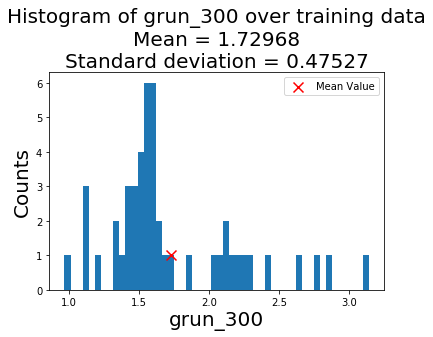

In [36]:
plot.baselineplot(total,bins=50)

## Signed error
signed_error_hist(dimension,*results,error_type='traning',unit_name=None,fontsize=20,**kw)

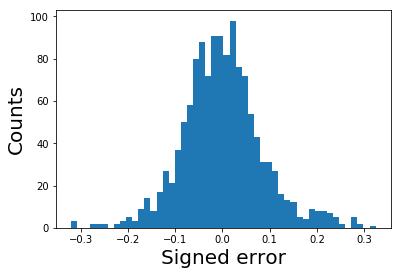

In [37]:
plot.signed_error_hist(2,*grun_cv,bins=50)

## Absolute error
absolute_error_hist(dimension,*results,error_type='traning',unit_name=None,fontsize=20,**kw)

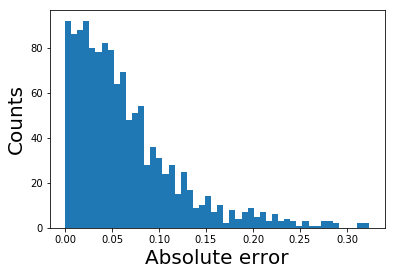

In [38]:
plot.absolute_error_hist(2,*grun_cv,bins=50)

## Property v.s. prediction
property_vs_prediction(dimension,*results,error_type='traning',unit_name=None,fontsize=20,**kw)

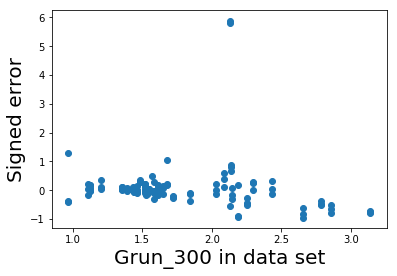

In [39]:
plot.property_vs_prediction(2,*grun_cv,error_type='prediction')

## Hist and box plot
hist_and_box_plot(dimension,*results,error_type='traning',unit_name=None,fontsize=20,selected_errors=None,marker_x=0,marker=None,**kw)

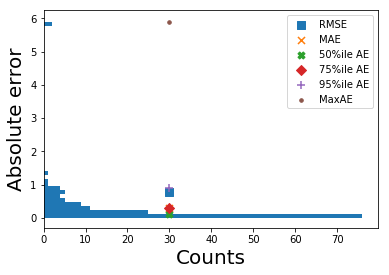

In [40]:
plot.hist_and_box_plot(2,*grun_cv,error_type='prediction',bins=50,marker_x=30)

## Absolute errors v.s. dimension of descriptor
abs_errors_vs_dimension(*results,error_type='traning',unit_name=None,fontsize=20,selected_errors=None,**kw)

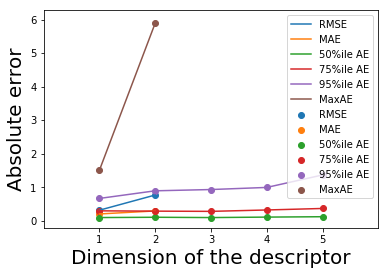

In [41]:
plot.abs_errors_vs_dimension(*grun_cv,error_type='prediction')